# <center> Curso Machine Learning e Imágenes en Python

* Docentes: Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Ayudantes: Catherine Acuña y Joaquín Funes
* Colaboran: Ing. Juan Manuel López
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio

## Temario a desarrollar:
*	Uso y herramientas básicas de Python
*	Imágenes digitales: tipos (binarias, monocromáticas y a color)
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	**Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación,** cierre y apertura.
*	Aplicaciones
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones

**CLASE 8: 20-09-2022**

    Binarización. Operaciones Morfológicas.
    
archivos necesarios para la notebook:

**Imágenes necesarias: 'lenna.jpg', 'ortopantomografia2.png','monedas.jpg', 'daisy.jpg', 'sudoku.png'**

## Librerías necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Binarización por Umbralizado

Transformación punto a punto, lugar a lugar
* Primero se define un valor de corte llamado $umbral$, con algún criterio (arbitrario, 127, media, Otsu, etc.) y se calcula en cada lugar:
 $$T(r)=\left\{
\begin{array}{lr}
  1& r\geq umbral\\
	0& r<umbral\\
\end{array}
\right.$$

*O su negativo:

$$T(r)=\left\{
\begin{array}{lr}
  0& r\geq umbral\\
	1& r<umbral\\
\end{array}
\right.$$




**¿Cómo elegimos el umbral?**
¡¡El histograma ayuda!!

In [2]:
imagenes_path = '/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/daisy.jpg'
img = cv2.imread(imagenes_path,0) #imagen monocroma
print(img)

[[38 39 39 ... 63 63 64]
 [39 40 40 ... 62 63 64]
 [40 41 42 ... 61 62 63]
 ...
 [54 52 51 ... 62 60 58]
 [50 49 50 ... 58 58 58]
 [50 49 50 ... 58 58 58]]


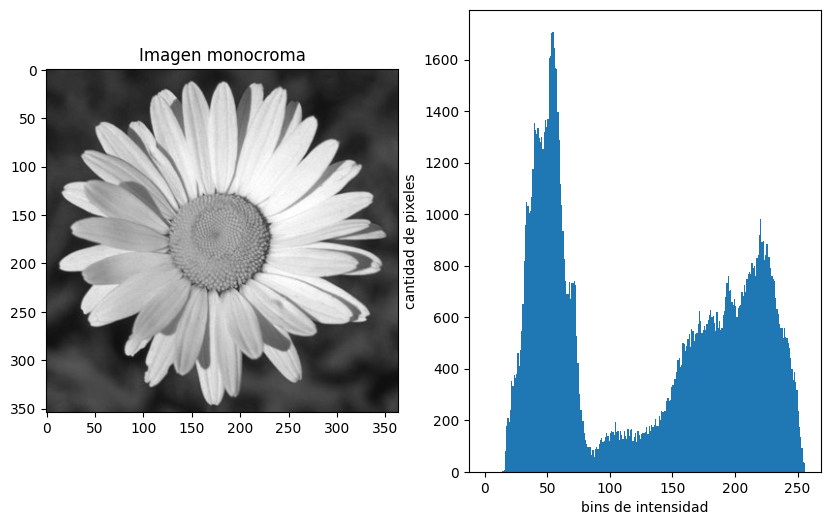

In [3]:
img = cv2.imread(imagenes_path,0) #imagen monocroma
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')

axs[1].hist(img[:,:].ravel(), 256,[0,256] )
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')

plt.show()



**Elegimos el umbral "a ojo"**

In [4]:
#umbral=85
umbral=180

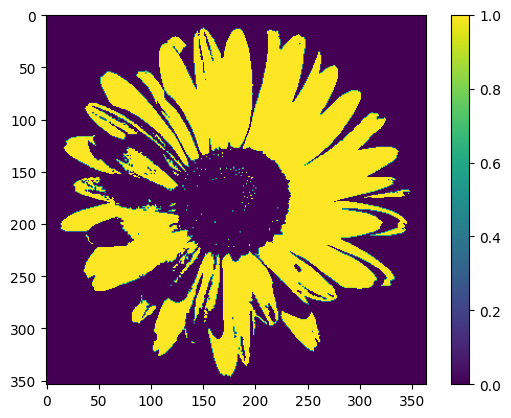

dtype('bool')

In [5]:
binaria_a_mano= img>= umbral

plt.imshow(binaria_a_mano)#, cmap='gray')
plt.colorbar()
plt.show()
binaria_a_mano.dtype

# Binarizado con cv2.threshold

OpenCV nos provee la función **cv2.threshold** para binarizar una imagen, una vez que hemos elegido (por algún método) dicho umbral.


In [6]:
ret,binaria = cv2.threshold(img,umbral,255,cv2.THRESH_BINARY)
print(type(img[0,0]),type(binaria[0,0]))
print(ret)

<class 'numpy.uint8'> <class 'numpy.uint8'>
180.0


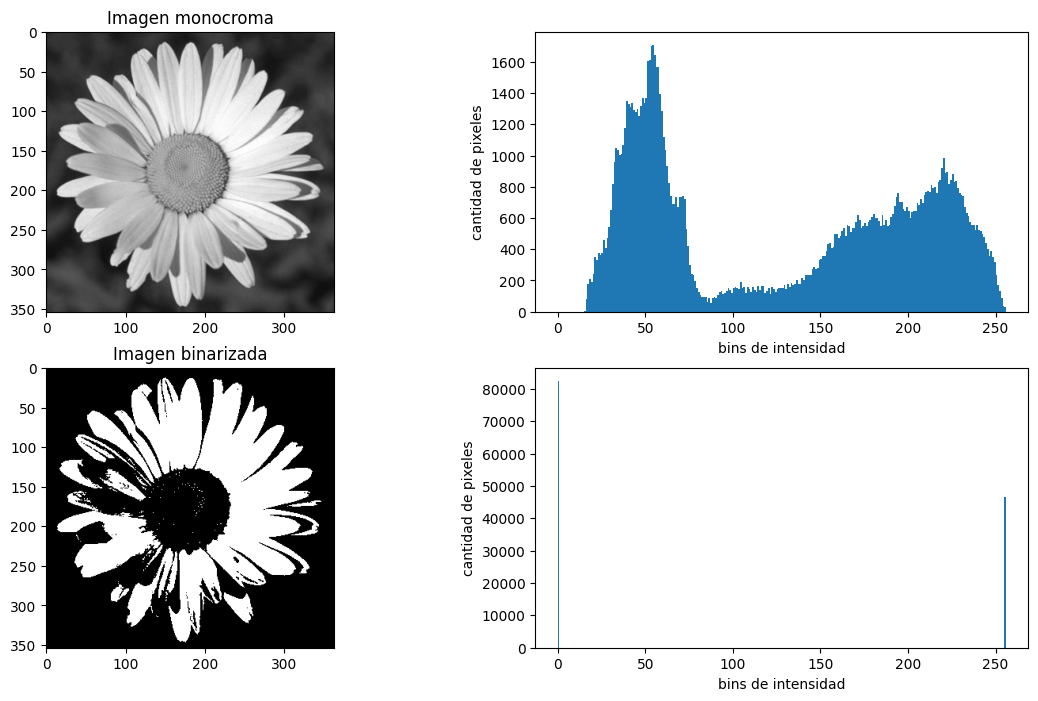

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(8)
fig.set_figwidth(14)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')
axs[1].hist(img[:,:].ravel(), 256,[0,256] )

axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')
axs[2].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen binarizada')

axs[3].hist(binaria[:,:].ravel(), 256,[0,256] )
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')

plt.show()

* Se puede generalizar a segmentación por umbralizado (varios umbrales), recordar menor resolución espectral en Ntb6

## Ejercicio
A partir de la imagen 'ortopantomografia2', obtenga una imagen binaria con unos, true o 255 en el lugar de los dientes

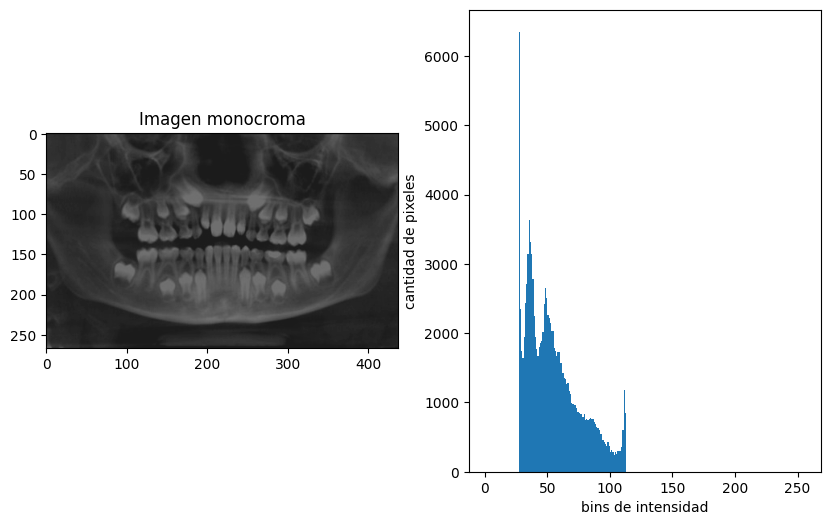

In [9]:
img = cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/ortopantomografia2.png',0) #imagen monocroma
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen monocroma')

axs[1].hist(img[:,:].ravel(), 256,[0,256] )
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')

plt.show()



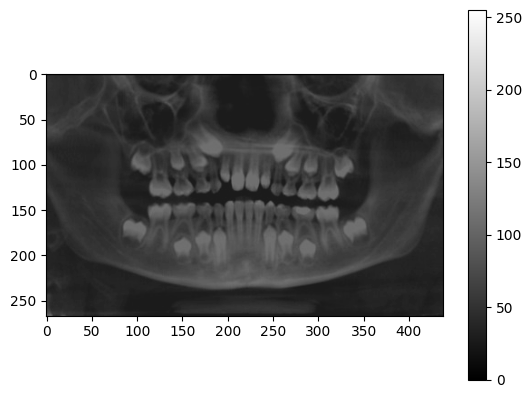

In [10]:
plt.imshow(img, cmap='gray',vmin=0 ,vmax=255)
plt.colorbar()

In [34]:
#umbral=85
umbral=220

In [35]:
binaria_a_mano= img>= umbral

plt.imshow(binaria_a_mano)#, cmap='gray')
plt.colorbar()
plt.show()
binaria_a_mano.dtype

TypeError: '>=' not supported between instances of 'NoneType' and 'int'

**Hasta ahora hemos elegido el umbral a ojo**



# Metodo Otsu para elección del umbral

Elige un umbral para separar los pixeles en 2 clases, intentando que *la varianza  en cada clase sea mínima y la varianza entre las 2 clases sea máxima.*

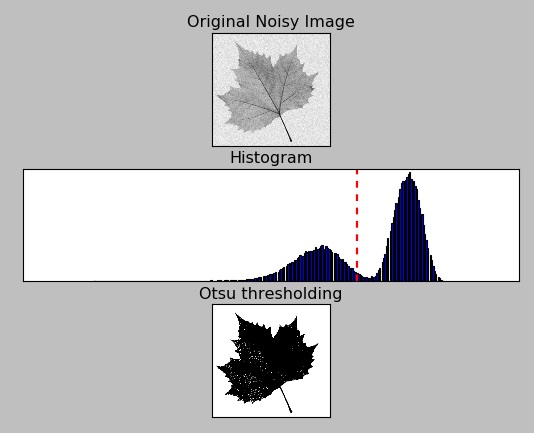


[Aqui](https://hbyacademic.medium.com/otsu-thresholding-4337710dc519) documentación más detallada

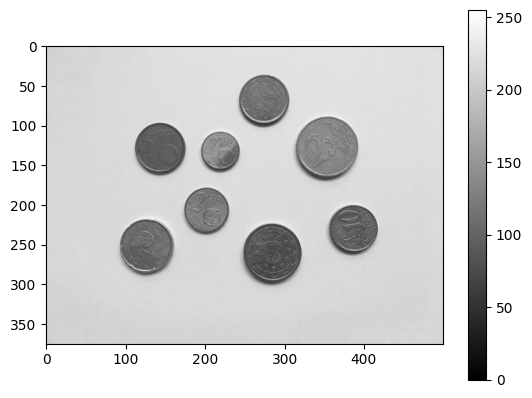

In [15]:
img = cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/monedas.jpg',0) #imagen monocroma
plt.imshow(img,cmap='gray',vmin=0 ,vmax=255)
plt.colorbar()
plt.show()


In [16]:
ret0,binaria0 = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
print(img.dtype,binaria0.dtype,'umbral:', ret0)

uint8 uint8 umbral: 162.0


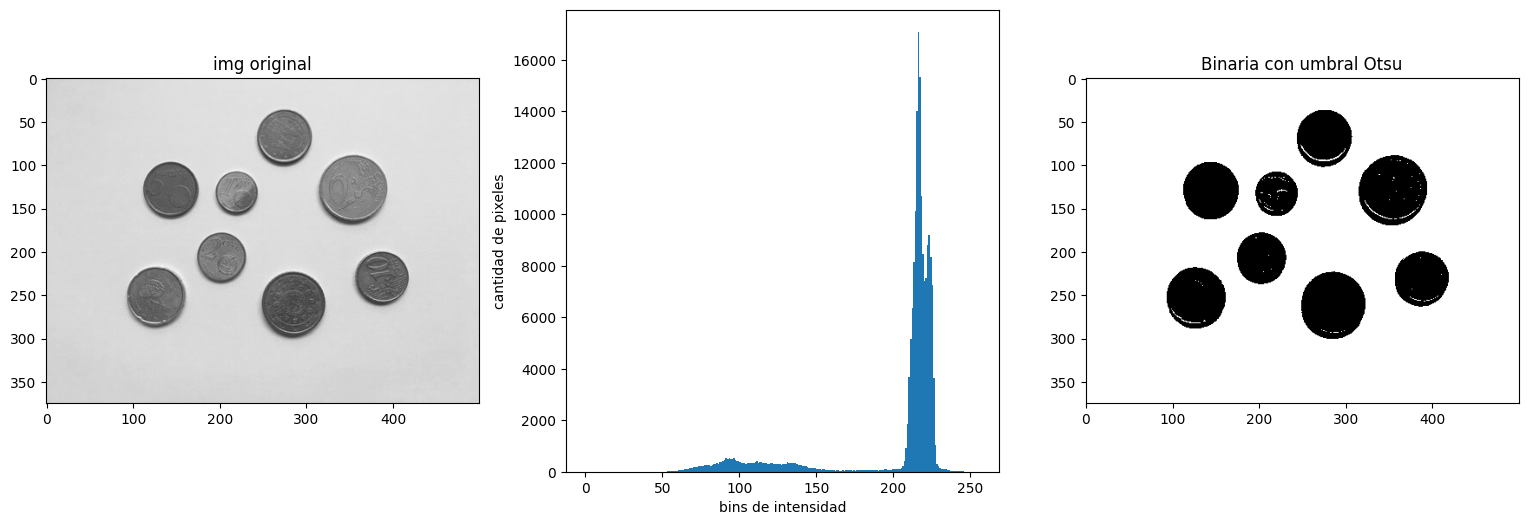

umbral calculado por Otsu: 162.0


In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(6)
fig.set_figwidth(19)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('img original')

axs[2].imshow(binaria0, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Binaria con umbral Otsu')

axs[1].hist(img[:,:].ravel(), 256,[0,256] )
axs[1].set_xlabel('bins de intensidad')
axs[1].set_ylabel('cantidad de pixeles')
plt.show()

print('umbral calculado por Otsu:', ret0)

# Binaria inversa o Negativo

In [18]:
ret1,binaria1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

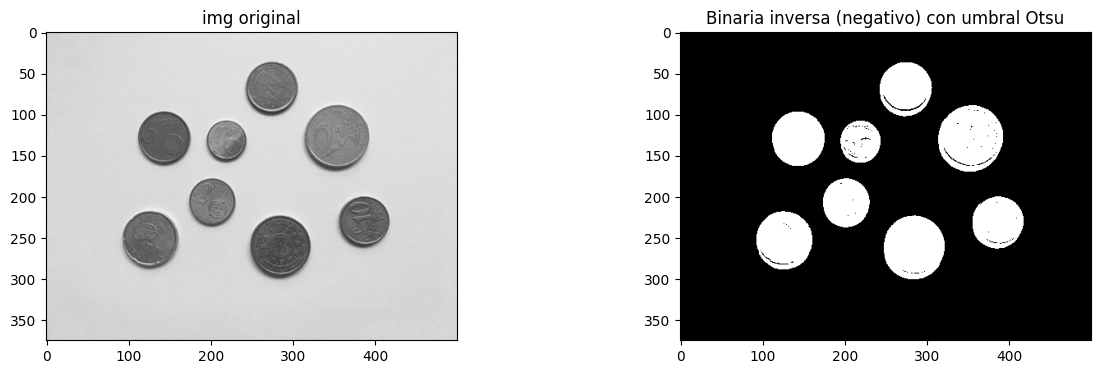

umbral calculado por Otsu: 162.0


In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('img original')
axs[1].imshow(binaria1, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Binaria inversa (negativo) con umbral Otsu')

plt.show()
print('umbral calculado por Otsu:', ret1)

# Binarización adaptativa (umbral local: media o media ponderada gaussiana, con offset)

En vez de usar un "umbral globlal" para toda la imagen, calcula un umbral diferente para pequeñas subregiones de la imagen (el tamaño cuadrado de la subregión es un parámetro). Es aconsejado en imágenes con iluminación variable.

[Aqui](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html) mas info

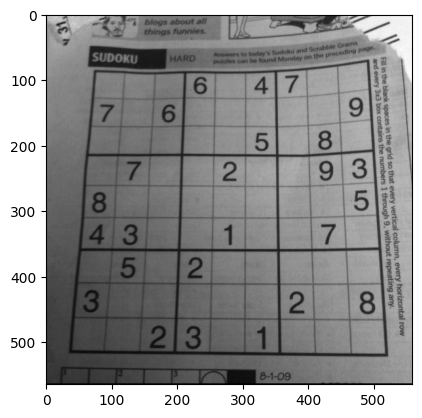

(565, 560) uint8


In [20]:
img = cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/sudoku.png',0) #imagen monocroma
plt.imshow(img, cmap='gray')#, plt.axis('off')
plt.show()
print(img.shape,img.dtype)

In [21]:
ret1,binaria1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

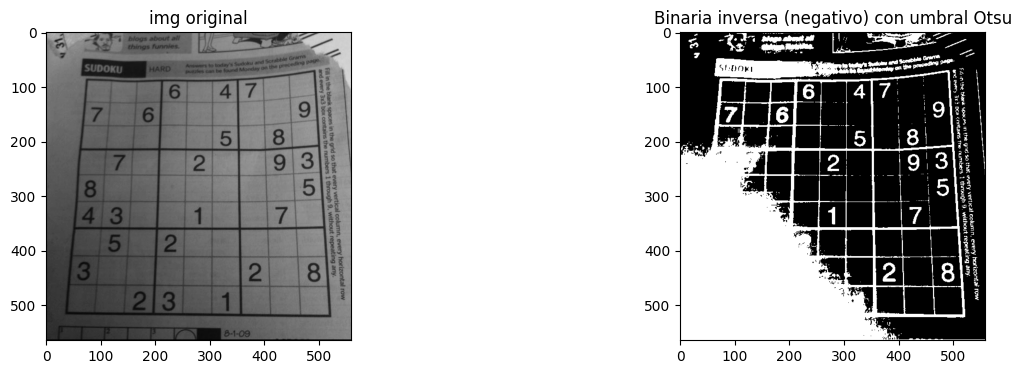

umbral calculado por Otsu: 95.0


In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(4)
fig.set_figwidth(15)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('img original')
axs[1].imshow(binaria1, cmap='gray',vmin=0 ,vmax=255)
axs[1].set_title('Binaria inversa (negativo) con umbral Otsu')

plt.show()
print('umbral calculado por Otsu:', ret1)

In [23]:
ancho=21 #entero impar, pues se considera un área de ancho x ancho
offset=30 #se le resta a la media para dar el umbral, mientras más alto más blancos en la imagen

binaria2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,ancho,offset)
binaria3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,ancho,offset)


#vamos a comparar los umbrales adaptativos con un umbral global que toma la media de la imagen
umbral=img.mean() #global
ret4,binaria4 = cv2.threshold(img,umbral-offset,255,cv2.THRESH_BINARY)


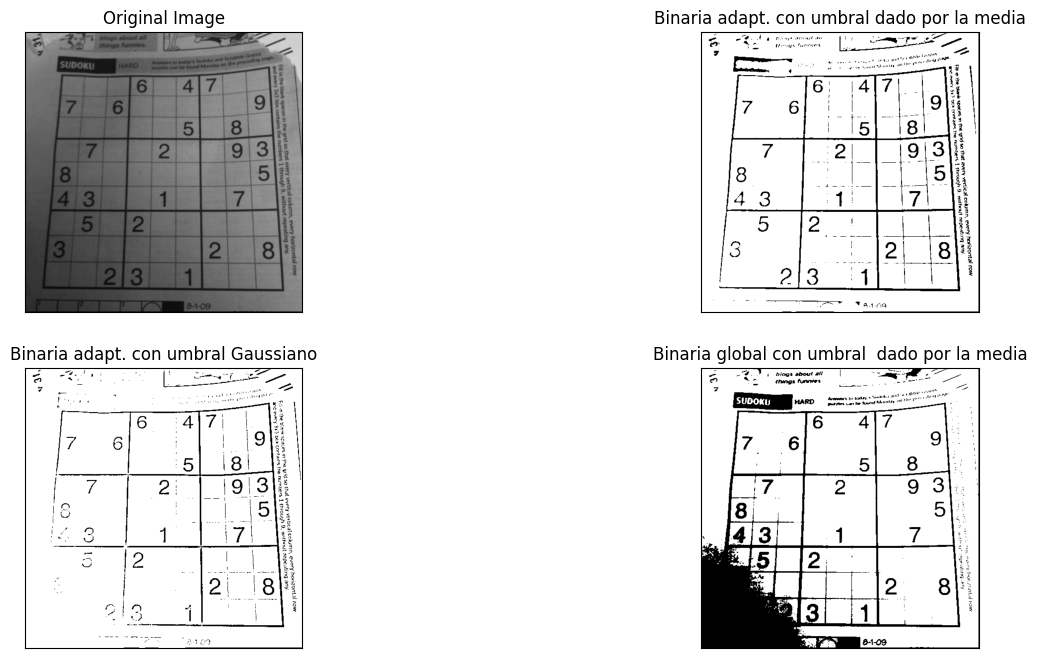

In [24]:
titles = ['Original Image', 'Binaria adapt. con umbral dado por la media'
, 'Binaria adapt. con umbral Gaussiano', 'Binaria global con umbral  dado por la media' ]
images = [img, binaria2, binaria3, binaria4]

fig = plt.gcf()
fig.set_size_inches(16, 8)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0 ,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Filtros en imágenes binarias: de mínimo y de máximo .
**erosion** y **dilatación** en el contexto de "Morfología"

Se usan especialmente para imágenes binarias. Los filtros lineales (promedios) NO tienen sentido en imágenes binarias.

**Erosión**  ↔  Filtro de Mínimo (se reducen los objetos/regiones blancas)).

**Dilatación**  ↔  Filtro de Máximo sobre los lugares definidos por el EE. (las regiones blancas aumentan su tamaño)

El elemento estructurante **EE** (o **SE**, Structuring Element) **EE** define los lugares donde se usan en la operación.



In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 5))
print(kernel,type(kernel),type(kernel[0,0]))

[[0 0 0 0 1 0 0 0 0]
 [0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 0 0 0 1 0 0 0 0]] <class 'numpy.ndarray'> <class 'numpy.uint8'>


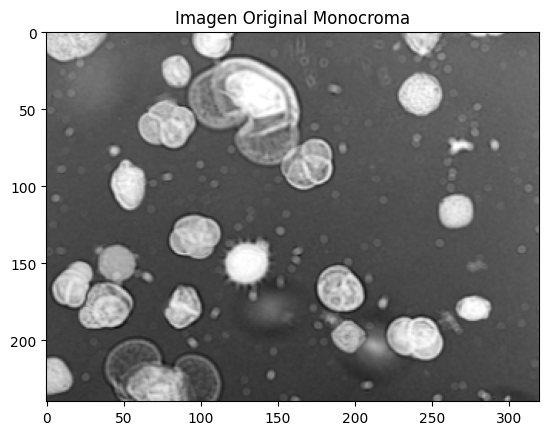

In [26]:
img = cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/POLLENS.TIF',0) #primero leemos una imagen en grises
plt.imshow(img,cmap='gray'),plt.title('Imagen Original Monocroma')
plt.show()

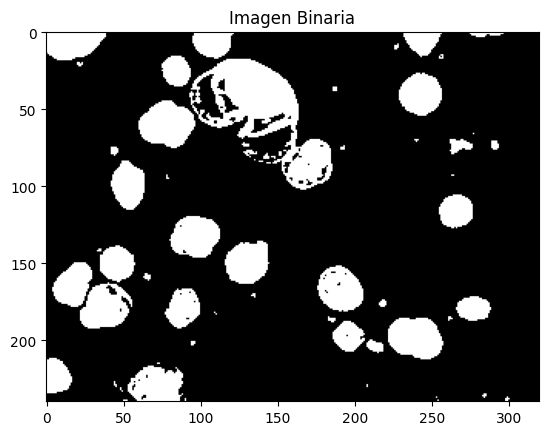

In [27]:
#la binarizamos con umbral automático (Por el método de Otsu)
umbral_otsu,img_binaria = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img_binaria,cmap='gray'),plt.title('Imagen Binaria')
plt.show()

### Filtramos

primero creamos el elemento estructurante (EE, SE o kernel binario)

In [28]:
kernel = np.ones((7,7),np.uint8) #creamos un elemento estructurante


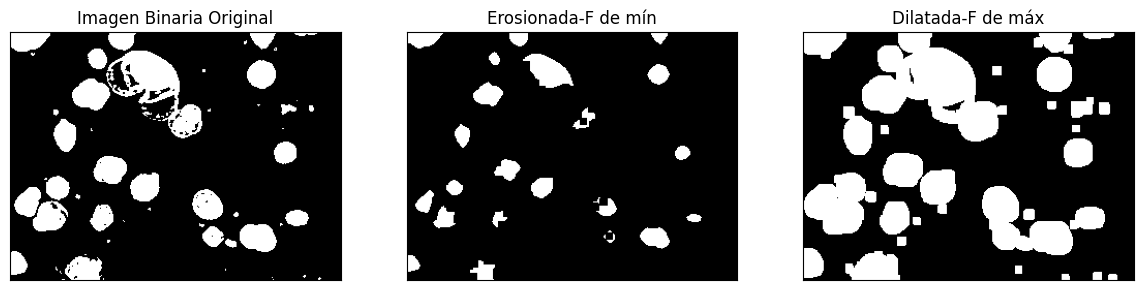

In [29]:
bin_erosionada = cv2.erode(img_binaria,kernel,iterations = 1)# erosionamos la imagen binaria: MÌNIMO
bin_dilatada = cv2.dilate(img_binaria,kernel,iterations = 1) #dilatamos la imagen binaria : MÁXIMO

#graficamos: imagen binaria, erosionada y dilatada
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,3,1), plt.imshow(img_binaria,cmap='gray'),plt.title('Imagen Binaria Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(bin_erosionada,cmap='gray'),plt.title('Erosionada-F de mín'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bin_dilatada,cmap='gray'),plt.title('Dilatada-F de máx'),plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imwrite('erosionada.png',bin_erosionada)
#cv2.imwrite('dilatada.png',bin_dilatada)

### Ejercicio:

Repita el ejercicio anterior pero cambiando el elemento estructurante por uno que crea más adecuado al problema.

**Aunque el efecto de erosión es contrario al de la dilatación esto NO debe llevar al error de considerar que erosionando una imagen dilatada (o dilatar una imagen erosionada) seremos capaces de recuperar la imagen original, esto NO es así.**

**NO son operaciones reversibles, y menos una la inversa de la otra.**

## Opcional: Extracción de Contornos

Contorno Exterior = Dilatación - Imagen_Binaria

Contorno Interior= Imagen_Binaria - Erosión

Gradiente Morfológico= Dilatación - Erosión


In [33]:
#Tomamos una imagen de la letra A y mostramos contornos y gradiente morfológico

img = cv2.imread('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/daisy.png',0)#lee la imagen en grises
ret,img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(np.unique(img_bin))

kernel = np.ones((5,5),np.uint8)#crea el elemento estructurante
erosion = cv2.erode(img_bin,kernel,iterations = 1)
dilatacion = cv2.dilate(img_bin,kernel,iterations = 1)
gradiente=cv2.morphologyEx(img_bin,cv2.MORPH_GRADIENT,kernel)

fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,4,1), plt.imshow(img_bin,cmap='gray'),plt.title('Imagen Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(img_bin-erosion,cmap='gray'),plt.title('Borde interior'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(dilatacion-img_bin,cmap='gray'),plt.title('Borde exterior'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(gradiente,cmap='gray'),plt.title('Gradiente'),plt.xticks([]), plt.yticks([])
plt.show()

[None]


[ WARN:0@238.223] global loadsave.cpp:248 findDecoder imread_('/Users/niconash/Desktop/Curso Imágenes Python/Imágenes necesarias/daisy.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/morph.dispatch.cpp:1010: error: (-215:Assertion failed) !src.empty() in function 'erode'
